In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [39]:
data = pd.read_csv("IRIS.csv")
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Visualisation and Analysis

In [20]:
data.shape

(150, 5)

In [23]:
data["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [26]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
X = data.iloc[:,:4]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
y = data.iloc[:,-1]
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

## Data Normalisation

In [31]:
X = preprocessing.StandardScaler().fit_transform(X)
X[0:4]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673]])

## Train Test Split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [33]:
knnmodel = KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(X_train,y_train)
y_pred = knnmodel.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)
acc

0.98

## Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.values,y_pred)
cm

array([[17,  0,  0],
       [ 0, 19,  0],
       [ 0,  1, 13]], dtype=int64)

In [40]:
cm1 = pd.DataFrame(data=cm, index=['setosa','versicolor','virginica'], columns=['setosa','versicolor','virginica'])
cm1

,setosa,versicolor,virginica
setosa,17,0,0
versicolor,0,19,0
virginica,0,1,13


## Output Visualisation

In [44]:
output = pd.DataFrame(data=[y_test.values,y_pred],index=["y_test","y_pred"])
output.transpose()

,y_test,y_pred
0,Iris-setosa,Iris-setosa
1,Iris-versicolor,Iris-versicolor
2,Iris-versicolor,Iris-versicolor
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor
6,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-virginica,Iris-virginica


In [45]:
output.iloc[0,:].value_counts()

Iris-versicolor    19
Iris-setosa        17
Iris-virginica     14
Name: y_test, dtype: int64

## Findng the Value of K

In [47]:
K = 21
mean_acc = np.zeros((K-1))

#train and predict
for n in range(1,K):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    y_pred = neigh.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test,y_pred)

In [48]:
mean_acc

array([0.96, 0.96, 0.98, 0.96, 0.96, 0.98, 0.98, 0.98, 0.96, 0.96, 0.96,
       0.96, 0.96, 0.96, 0.96, 0.96, 0.94, 0.94, 0.94, 0.96])

In [50]:
print("The best accuracy is ",mean_acc.max(),"with k=",mean_acc.argmax()+1)

The best accuracy is  0.98 with k= 3


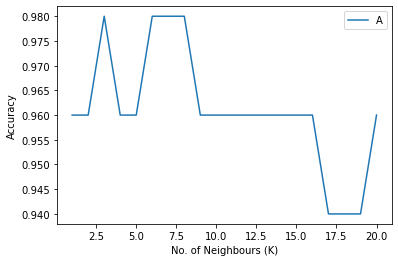

In [51]:
plt.plot(range(1,K),mean_acc)
plt.legend(("Accuracy"))
plt.ylabel("Accuracy")
plt.xlabel("No. of Neighbours (K)")
plt.show()